In [1]:
import os, sys

sys.path.insert(0, os.path.abspath("../../.."))

In [2]:
from models.xgboost.model_2.model import XgboostModel2
import pandas as pd
from pandas.plotting import scatter_matrix
from lib.data_splitter import split_features_and_target_into_train_and_test_set
from lib.data_util import load_candlesticks
from matplotlib import cm


In [3]:
candlesticks = load_candlesticks("BTCUSDT", "1h", custom_tmp_path="../../../tmp")

candlesticks

Closetime of newest candle is 1587038399999
Only using data on file. Will not download new data from Binance.


,open time,open,high,low,close,volume,close time,quote asset volume,number of trades,taker buy base asset volume,taker buy quote asset volume
0,1502942400000,4261.48,4313.62,4261.32,4308.83,47.181009,1502945999999,2.023661e+05,171,35.160503,1.509525e+05
1,1502946000000,4308.83,4328.69,4291.37,4315.32,23.234916,1502949599999,1.003048e+05,102,21.448071,9.260828e+04
2,1502949600000,4330.29,4345.45,4309.37,4324.35,7.229691,1502953199999,3.128231e+04,36,4.802861,2.079532e+04
3,1502953200000,4316.62,4349.99,4287.41,4349.99,4.443249,1502956799999,1.924106e+04,25,2.602292,1.129135e+04
4,1502956800000,4333.32,4377.85,4333.32,4360.69,0.972807,1502960399999,4.239504e+03,28,0.814655,3.552747e+03
...,...,...,...,...,...,...,...,...,...,...,...
23252,1587020400000,6688.63,6818.46,6686.39,6780.00,3399.164609,1587023999999,2.300670e+07,22202,1901.518707,1.285952e+07
23253,1587024000000,6893.24,6923.52,6871.13,6888.30,1641.824781,1587027599999,1.132671e+07,12148,873.070968,6.024127e+06
23254,1587027600000,7045.30,7097.00,7017.00,7027.09,4302.835917,1587031199999,3.038567e+07,31923,2361.179694,1.667550e+07
23255,1587031200000,7027.70,7061.80,7026.77,7040.00,1512.420788,1587034799999,1.066239e+07,12131,938.969209,6.619599e+06


In [4]:
features = XgboostModel2.generate_features(candlesticks)
target = XgboostModel2.generate_target(features)

features

,open,high,low,close,volume,quote asset volume,number of trades,taker buy base asset volume,taker buy quote asset volume,volume_adi,...,momentum_roc-2,momentum_roc-3,momentum_roc-4,momentum_roc-5,momentum_roc-10,momentum_roc-15,momentum_roc-20,momentum_roc-30,momentum_roc-50,momentum_roc-80
0,4261.48,4313.62,4261.32,4308.83,47.181009,2.023661e+05,171,35.160503,1.509525e+05,3.853868e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4308.83,4328.69,4291.37,4315.32,23.234916,1.003048e+05,102,21.448071,9.260828e+04,4.512564e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4330.29,4345.45,4309.37,4324.35,7.229691,3.128231e+04,36,4.802861,2.079532e+04,4.389931e+01,...,0.360191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4316.62,4349.99,4287.41,4349.99,4.443249,1.924106e+04,25,2.602292,1.129135e+04,4.834256e+01,...,0.803417,0.955248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4333.32,4377.85,4333.32,4360.69,0.972807,4.239504e+03,28,0.814655,3.552747e+03,4.856561e+01,...,0.840358,1.051370,1.203575,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23252,6688.63,6818.46,6686.39,6780.00,3399.164609,2.300670e+07,22202,1901.518707,1.285952e+07,1.317544e+06,...,2.233917,2.381502,1.926225,2.078917,0.781877,0.749230,-0.044228,-1.418526,-1.489714,-1.793073
23253,6893.24,6923.52,6871.13,6888.30,1641.824781,1.132671e+07,12148,873.070968,6.024127e+06,1.316979e+06,...,3.576917,3.866945,4.016888,3.554339,2.673142,2.096383,2.601111,-0.040632,0.236611,2.522009
23254,7045.30,7097.00,7017.00,7027.09,4302.835917,3.038567e+07,31923,2361.179694,1.667550e+07,1.313761e+06,...,3.644395,5.663853,5.959725,6.112689,6.129517,4.132343,4.407122,1.745152,3.070212,5.005596
23255,7027.70,7061.80,7026.77,7040.00,1512.420788,1.066239e+07,12131,938.969209,6.619599e+06,1.313391e+06,...,2.202285,3.834808,5.857976,6.154391,7.102379,4.606085,4.798397,2.157941,3.802045,4.732605


In [9]:
(
    training_set_features,
    training_set_target,
    test_set_features,
    test_set_target,
) = split_features_and_target_into_train_and_test_set(features, target, 20)

In [6]:
# scatte = scatter_matrix(test_set_features.iloc[:, -5:], c=test_set_target.iloc[:], s=40, hist_kwds={"bins": 15}, figsize=(20,20))

In [7]:
xg_boost = XgboostModel2()
xg_boost.train(training_set_features, training_set_target)
xg_boost.evaluate(test_set_features, test_set_target)

RMSE: 0.342000
Accuracy: 90.24%
kfold Accuracy: 47.27% (32.31%)


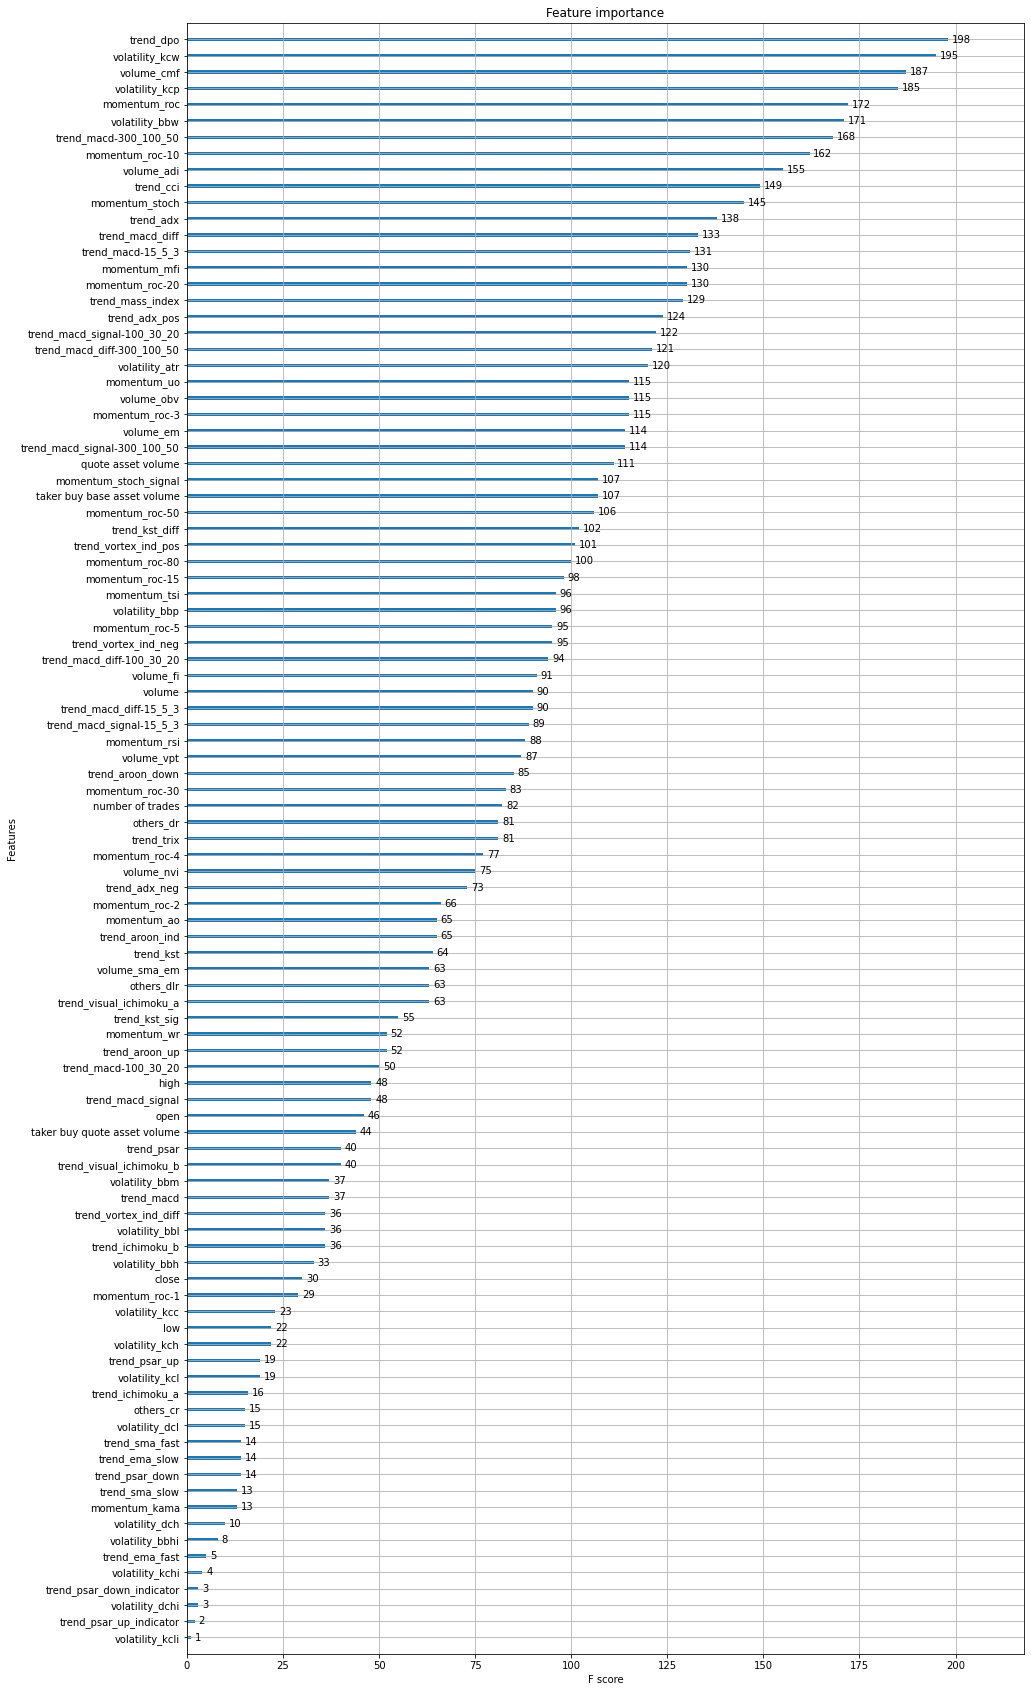

In [11]:
xg_boost.print_info()

In [10]:
features["open"].describe()

count    23257.000000
mean      7532.677058
std       2753.764339
min       2870.900000
25%       5723.000000
50%       7310.820000
75%       9154.980000
max      19709.500000
Name: open, dtype: float64